In [16]:
%load_ext autoreload  
%autoreload 2  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from ocpy.data import Data
from ocpy.oc import Linear, Parameter
# (OC_LMFit, OC ve diğerleri zaten ocpy içinde)

# 1) Veri → OC (cycles ve oc kolonları hazır)

columns = {
    "minimum_time": "Mintimes",   # dosyada HJD kolonun varsa
    "minimum_time_error": "Errors",
    # "weights": "Weight",
    "minimum_type": "Mintypes",
    # "labels": "Comment",
}
data = Data.from_file("xy_boo.xlsx", columns=columns).fill_errors(0.03).calculate_weights()
ref_minimum = 2440389.5857    # ← bunu sen vereceksin
ref_period  = 0.37056878      # ← bunu da sen vereceksin

In [18]:
oc = data.calculate_oc(reference_minimum=ref_minimum, reference_period=ref_period)


(<Figure size 1000x540 with 1 Axes>, <Axes: xlabel='Cycle', ylabel='O−C'>)

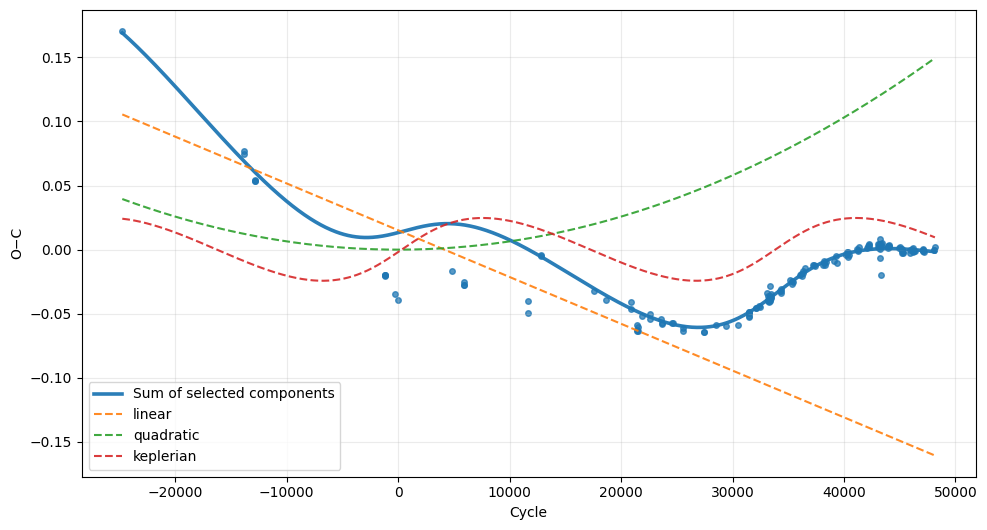

In [19]:
from ocpy.oc import Linear, Parameter, Quadratic, Keplerian, KeplerianOld
linear = Linear(a=-3.6505170e-006, b=0.015145408)
quad = Quadratic(q=6.4445756e-011)
kep = KeplerianOld(amp=0.025145525, e=0.22593619, P=33515.933, T=33706.819, omega=357.87075)
oc.plot_components_on_data([linear, quad, kep])